## EDA for accepted loan data before 2015 - the Lending Club

### Objectives:
    - finding the profit and loss

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
accepted = pd.read_csv("accepted_before_2015.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

In [3]:
accepted.dtypes

id                       object
loan_amnt                object
funded_amnt              object
funded_amnt_inv          object
term                     object
                          ...  
settlement_status        object
settlement_date          object
settlement_amount        object
settlement_percentage    object
settlement_term          object
Length: 150, dtype: object

In [4]:
accepted.shape

(466345, 150)

In [5]:
#checking the status of loans and calculated the ratio by the toal number loans

status = accepted.groupby("loan_status")[["loan_status"]].count()
status = accepted.groupby("loan_status")[["loan_status"]].count()
status['ratio'] = ((status[['loan_status']]/accepted.shape[0])*100).round(2)

status.sort_values(by=["ratio"], ascending=False)

,loan_status,ratio
loan_status,,
Fully Paid,374560,80.32
Charged Off,76499,16.40
Current,11925,2.56
Does not meet the credit policy. Status:Fully Paid,1988,0.43
Does not meet the credit policy. Status:Charged Off,761,0.16
Late (31-120 days),337,0.07
In Grace Period,201,0.04
Late (16-30 days),73,0.02
Default,1,0.00


In [6]:
#Checking how many unique grades exist
accepted['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [7]:
#changeing back the interest rates to numeric datsets
accepted["int_rate"] = pd.to_numeric(accepted["int_rate"])

#Median interest rate by grade
accepted.groupby('grade').agg({"int_rate":"median"})

,int_rate
grade,
A,7.69
B,11.67
C,14.49
D,17.57
E,20.50
F,23.76
G,25.80


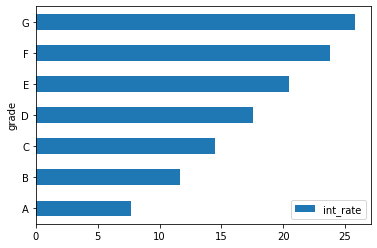

In [8]:
#bar charts for median interest rate by grade

int_r = accepted.groupby('grade').agg({"int_rate":"median"})
int_r.plot.barh()

In [1]:
#Visualizing the numbers by grade and term
term_by_grade = pd.DataFrame(accepted.groupby('grade')['term'].value_counts())
term_by_grade.plot.barh().invert_yaxis()

NameError: name 'pd' is not defined

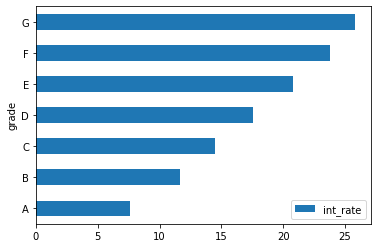

In [10]:
#Conduction above operations to "fully-paid" loans
fully_paid = accepted[accepted['loan_status']=="Fully Paid"]
fully_paid.groupby('grade').agg({"int_rate":"median"}).plot.barh()

In [11]:
#comparing the total and fully_paid loans in terms of median interest rate. Grade A median rate is lower than the total median rate.

compare = fully_paid.groupby('grade').agg({"int_rate":"median"}) 
compare[['difference']] = compare[['int_rate']] - int_r[["int_rate"]]
compare

,int_rate,difference
grade,,
A,7.62,-0.07
B,11.67,0.00
C,14.49,0.00
D,17.57,0.00
E,20.80,0.30
F,23.76,0.00
G,25.80,0.00


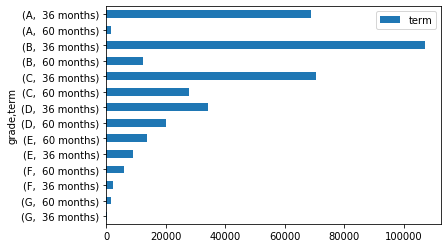

In [12]:
#Counts of loans by term and grade (in fully_paid loans)
#Grade B & 36 months were the highest. (A &36 months)
term_fully = pd.DataFrame(fully_paid.groupby('grade')['term'].value_counts())
#term_fully = term_fully.sort_values(by="term", ascending=False)
term_fully.plot.barh().invert_yaxis()

In [13]:
#term_fully = term_fully.reset_index
term_fully.columns
#sort_values(by="term")

Index(['term'], dtype='object')

In [14]:
accepted = pd.DataFrame(accepted)
accepted["loan_amnt"] = pd.to_numeric(accepted["loan_amnt"])

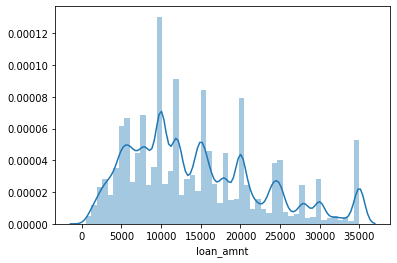

In [15]:
#distribution plot for accepted loans

sns.distplot(accepted['loan_amnt'].dropna())

In [16]:
#For a given loan, the profit-and-loss (in percentages) can be computed as the (total_payment - principal)/principal.

#replacing texts from term columns
accepted['term'] = accepted['term'].str.replace(r'\D', '').astype(int)

#changing relevant columns to numeric
accepted["loan_amnt"] = pd.to_numeric(accepted["loan_amnt"])
accepted["installment"] = pd.to_numeric(accepted["installment"])

accepted["return"] = (accepted["installment"]*accepted["term"])-accepted["loan_amnt"]

In [17]:
#Summary of "return" (profit and loss)

accepted["return"].describe()

count    466345.000000
mean       4506.579981
std        4513.914936
min      -19924.000000
25%        1526.600000
50%        2732.000000
75%        6017.120000
max       27950.200000
Name: return, dtype: float64

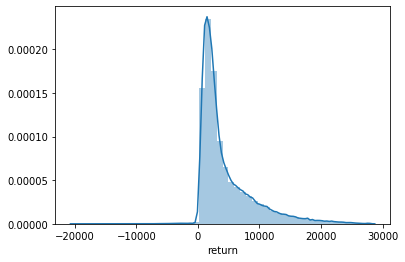

In [18]:
#distribution of "return"

sns.distplot(accepted['return'].dropna())

In [19]:
#Operating the same for only "fully_paid" loans
fully_paid = accepted[accepted['loan_status']=="Fully Paid"]
fully_paid = pd.DataFrame(fully_paid)
fully_paid["return"] = (fully_paid["installment"]*fully_paid["term"])-fully_paid["loan_amnt"]

In [20]:
fully_paid.describe()

,loan_amnt,term,int_rate,installment,return
count,374560.000000,374560.000000,374560.000000,374560.000000,374560.000000
mean,13974.717602,41.307027,13.321745,427.717619,4039.572093
std,8209.295871,9.960139,4.254557,245.459524,4157.673913
min,500.000000,36.000000,5.420000,4.930000,-19924.000000
25%,7925.000000,36.000000,10.150000,249.540000,1434.000000
50%,12000.000000,36.000000,13.110000,374.140000,2496.800000
75%,19600.000000,36.000000,15.880000,562.310000,5026.800000
max,35000.000000,60.000000,26.060000,1409.990000,27950.200000


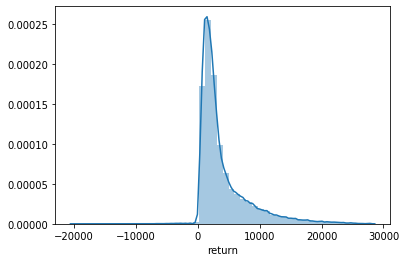

In [21]:
sns.distplot(fully_paid['return'].dropna())

In [22]:
fully_paid.groupby("grade").median()
#If grouped by the grade, fully paid loans has the highest returns from G to A as interest rates are higher for lower 
#grades.

,loan_amnt,term,int_rate,installment,return
grade,,,,,
A,12000.0,36,7.62,370.480,1431.44
B,11850.0,36,11.67,355.840,2148.92
C,12000.0,36,14.49,360.560,3146.84
D,12300.0,36,17.57,379.225,4525.84
E,16000.0,60,20.80,469.390,8462.64
F,18000.0,60,23.76,523.340,11897.00
G,20675.0,60,25.80,614.870,15386.60


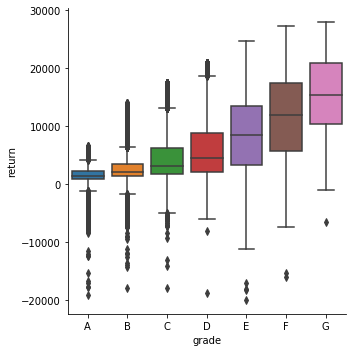

In [68]:
#Fully_paid box plot by median of return by grade
order2 = fully_paid.groupby("grade")[['return']].median().sort_values(by="return", ascending=True)
order2
sns.catplot(x="grade", y="return", kind="box", data=fully_paid, order=order2.index)


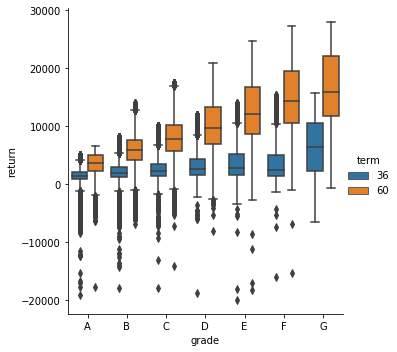

In [69]:
#Fully_paid box plot by median of return by grade
order2 = fully_paid.groupby("grade")[['return']].median().sort_values(by="return", ascending=True)
order2
sns.catplot(x="grade", y="return", kind="box", hue="term", data=fully_paid, order=order2.index)

In [23]:
#peroforming the same for Current
current = accepted[accepted['loan_status']=="Current"]
current = pd.DataFrame(current)
current["return"] = (current["installment"]*current["term"])-current["loan_amnt"]

In [24]:
#This is not accurate since these loans are not fully paid yet, but calculating returns based on the full duration
#not capturing if the loans reached completion at the cut-off date: Dec 2015
current.describe()

,loan_amnt,term,int_rate,installment,return
count,11925.000000,11925.0,11925.000000,11925.000000,11925.000000
mean,19999.624738,60.0,15.701291,484.417094,9065.400922
std,7407.311305,0.0,3.732509,186.212317,4309.631693
min,2000.000000,60.0,6.000000,49.700000,982.000000
25%,14000.000000,60.0,13.350000,334.930000,5844.600000
50%,19000.000000,60.0,15.590000,452.890000,8040.600000
75%,25000.000000,60.0,18.240000,600.470000,11364.400000
max,35000.000000,60.0,26.060000,1047.710000,27862.600000


In [25]:
#peroforming the same for Current
charged_off = accepted[accepted['loan_status']=="Charged Off"]
charged_off = pd.DataFrame(charged_off)
charged_off["loss"] = (charged_off["installment"]*charged_off["term"])-charged_off["loan_amnt"]

In [26]:
#renaming the column name from return to loss since for charged_off, it is a loss instead of profit/return.
charged_off = charged_off.drop(["return"], axis=1)
charged_off.describe()

,loan_amnt,term,int_rate,installment,loss
count,76499.000000,76499.000000,76499.000000,76499.000000,76499.000000
mean,15254.868691,46.251428,15.976997,449.585086,6123.407725
std,8398.933148,11.871998,4.250632,240.008035,5381.975261
min,900.000000,36.000000,5.420000,21.620000,-19406.680000
25%,9000.000000,36.000000,13.050000,278.425000,2027.440000
50%,14000.000000,36.000000,15.610000,400.400000,4240.240000
75%,20000.000000,60.000000,18.920000,581.090000,8898.200000
max,35000.000000,60.000000,26.060000,1408.130000,27950.200000


In [27]:
charged_off.groupby("grade").median()

#If grouped by the grade, charged off loans has the highest returns from G to A as interest rates are higher for lower 
#grades. 

,loan_amnt,term,int_rate,installment,loss
grade,,,,,
A,11000.0,36,7.90,334.800,1398.60
B,11700.0,36,11.86,348.295,2222.00
C,12375.0,36,14.64,369.650,3766.28
D,14500.0,36,17.57,402.570,5736.00
E,17562.5,60,20.80,491.305,9934.20
F,19075.0,60,23.83,555.825,13096.20
G,20000.0,60,25.83,598.030,15492.20


In [29]:
charged_off_med = charged_off.groupby("grade").median()

In [66]:
charged_off_med.reset_index()
order = charged_off.groupby("grade")[['loss']].median().sort_values(by="loss", ascending=True)
order

,loss
grade,
A,1398.60
B,2222.00
C,3766.28
D,5736.00
E,9934.20
F,13096.20
G,15492.20


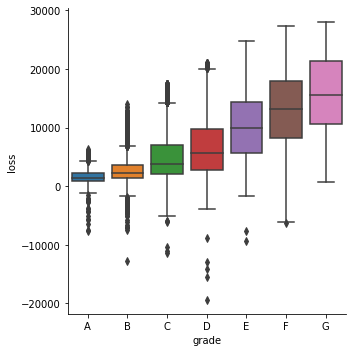

In [67]:
#Charged_off box plot by grade 
sns.catplot(x="grade", y="loss", kind="box", data=charged_off, order=order.index)


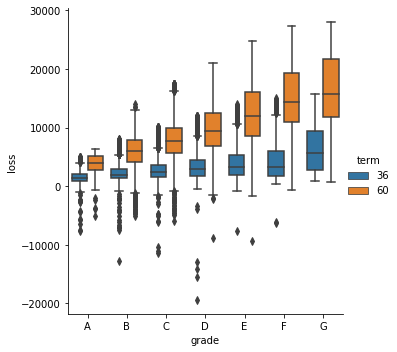

In [70]:
sns.catplot(x="grade", y="loss", kind="box", hue="term", data=charged_off, order=order.index)

In [73]:
#checking the purposes of loans by counts
fully_paid["purpose"].value_counts()

debt_consolidation    217454
credit_card            86490
home_improvement       21739
other                  18650
major_purchase          8197
small_business          4974
car                     4646
medical                 3672
moving                  2332
vacation                2051
wedding                 2009
house                   1799
renewable_energy         278
educational              269
Name: purpose, dtype: int64

In [80]:
#return median by the purpose of loans
fully_paid.groupby('purpose')[["return"]].median().sort_values(by="return", ascending=False)

,return
purpose,
small_business,3106.32
house,3018.20
debt_consolidation,2785.52
credit_card,2361.12
home_improvement,2256.00
wedding,1889.56
renewable_energy,1712.36
other,1692.64
medical,1489.92


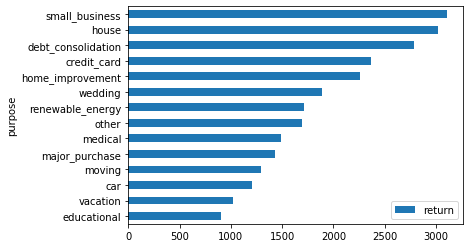

In [83]:
purpose_ = fully_paid.groupby('purpose')[["return"]].median().sort_values(by="return", ascending=False)
purpose_.plot.barh().invert_yaxis()

#Small_Business, house, debt_consolidation , credit_card, home_improvement have good return ratios.

In [100]:
fully_paid["issue_d"]= pd.to_datetime(fully_paid["issue_d"], format='%Y%m', errors='ignore')
fully_paid.index = fully_paid["issue_d"]

In [101]:
fully_paid["issue_d"].head()

issue_d
2014-12-01   2014-12-01
2014-12-01   2014-12-01
2014-12-01   2014-12-01
2014-12-01   2014-12-01
2014-12-01   2014-12-01
Name: issue_d, dtype: datetime64[ns]

In [102]:
fully_paid.groupby(["grade", pd.Grouper(freq='M')])[["return"]].median().nlargest(20, "return")
#largest return rates by month

return
grade issue_d            
G     2012-11-30  22653.6
      2012-05-31  22285.8
      2011-09-30  21187.4
      2012-10-31  20696.8
      2012-06-30  20652.8
      2012-08-31  20558.4
      2012-09-30  20502.0
      2011-11-30  20474.4
      2012-12-31  20445.0
      2013-06-30  19950.2
      2013-08-31  19733.6
      2013-07-31  19539.7
      2012-07-31  19399.0
      2013-09-30  19165.8
      2011-10-31  18999.0
      2012-03-31  18808.8
F     2012-10-31  18004.4
      2012-11-30  17831.0
      2012-04-30  17570.6
G     2013-02-28  17518.4

In [129]:
G = fully_paid[fully_paid['grade']=="G"]

/Users/kisaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


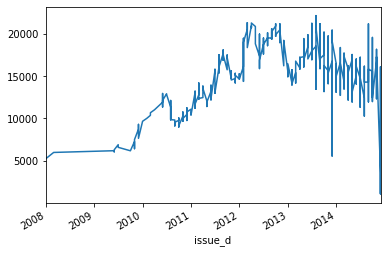

In [130]:
#Time series analysis for grade G loans' returns by year

from scipy.signal import lfilter
n = 20  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

G['return'] = lfilter(b, a, G['return'])
plt.figure()
#G['return'].cumsum()

#G['return'] = G["return"].rolling(window=len(G)).mean().iloc[len(G)-1:].values
G['return'].plot()

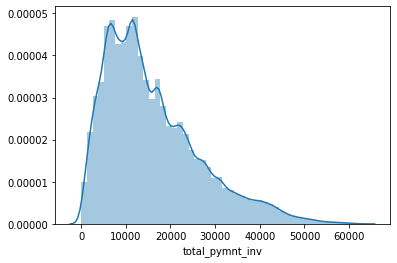

In [133]:
#distribution plot for total payments
accepted["total_pymnt_inv"] =pd.to_numeric(accepted["total_pymnt_inv"])
sns.distplot(accepted["total_pymnt_inv"])

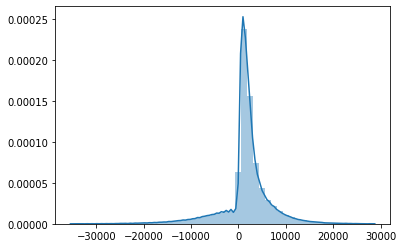

In [134]:
#distribution plot for returns and losses for the investors
sns.distplot(accepted["total_pymnt_inv"]-accepted["loan_amnt"])

In [135]:
accepted["return/loss"] = accepted["total_pymnt_inv"]-accepted["loan_amnt"]

In [136]:
accepted["return/loss"].describe() #mean is $1633.

count    466345.000000
mean       1633.136798
std        5031.190925
min      -35000.000000
25%         587.510000
50%        1608.300000
75%        3313.880000
max       28296.880000
Name: return/loss, dtype: float64

In [138]:
accepted["return/loss"].median() #median is $1608.

1608.2999999999993

In [140]:
#Operating the same for only "fully_paid" loans
fully_paid = accepted[accepted['loan_status']=="Fully Paid"]
fully_paid = pd.DataFrame(fully_paid)
fully_paid["return2"] = (fully_paid["total_pymnt_inv"])-fully_paid["loan_amnt"]

In [141]:
fully_paid.groupby("grade").median() 

,loan_amnt,term,int_rate,installment,total_pymnt_inv,return,return/loss,return2
grade,,,,,,,,
A,12000.0,36,7.62,370.480,13150.720,1431.44,1138.010,1138.010
B,11850.0,36,11.67,355.840,13126.255,2148.92,1718.695,1718.695
C,12000.0,36,14.49,360.560,14552.820,3146.84,2333.050,2333.050
D,12300.0,36,17.57,379.225,15817.760,4525.84,2921.510,2921.510
E,16000.0,60,20.80,469.390,21203.460,8462.64,4523.660,4523.660
F,18000.0,60,23.76,523.340,24841.180,11897.00,5919.530,5919.530
G,20675.0,60,25.80,614.870,29537.515,15386.60,7900.180,7900.180


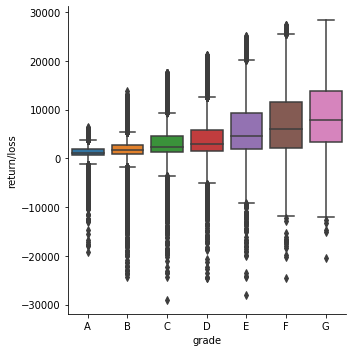

In [142]:
order3 = fully_paid.groupby("grade")[['return/loss']].median().sort_values(by="return/loss", ascending=True)
order3
sns.catplot(x="grade", y="return/loss", kind="box", data=fully_paid, order=order3.index)


<Figure size 3200x1600 with 0 Axes>

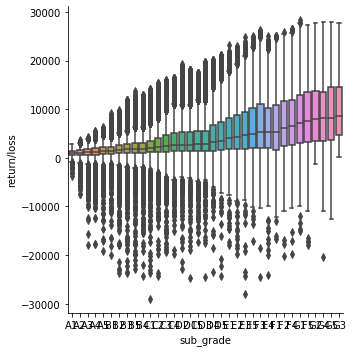

In [150]:
order4 = fully_paid.groupby("sub_grade")[['return/loss']].median().sort_values(by="return/loss", ascending=True)
order4


from matplotlib.pyplot import figure
figure(num=None, figsize=(40, 20), dpi=80, facecolor='w', edgecolor='k')
plt.figure
sns.catplot(x="sub_grade", y="return/loss", kind="box", data=fully_paid, order=order4.index)
